## Task 3

In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px

In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
import numpy as np
import pandas as pd
from helper import TelecomHelper
import plots
from clean_telecom_df import CleanTelecomData

pd.options.display.float_format = "{:.6f}".format

### Loding our cleaned dataframe

In [4]:
CSV_PATH = "../data/cleaned_data.csv"

In [5]:
TelecomHelper = TelecomHelper()

In [6]:
df = TelecomHelper.read_csv(CSV_PATH)

file read as csv


### changing handset_type and msisdn to categorical type

In [8]:
df['msisdn/number'] = df['msisdn/number'].astype("int")
df['msisdn/number'] = df['msisdn/number'].astype("category")

df['handset_type'] = df['handset_type'].astype("category")
cleaned_df = df

In [9]:
experience_df = cleaned_df[['msisdn/number', 'avg_rtt_dl_(ms)', 'avg_rtt_ul_(ms)', 
           'avg_bearer_tp_dl_(kbps)', 'avg_bearer_tp_ul_(kbps)',
           'tcp_ul_retrans._vol_(bytes)', 'tcp_dl_retrans._vol_(bytes)',
           'handset_type']]

experience_df.head()

,msisdn/number,avg_rtt_dl_(ms),avg_rtt_ul_(ms),avg_bearer_tp_dl_(kbps),avg_bearer_tp_ul_(kbps),tcp_ul_retrans._vol_(bytes),tcp_dl_retrans._vol_(bytes),handset_type
0,-2147483648,42.000000,5.000000,23.000000,44.000000,772902.274842,21052378.161588,Samsung Galaxy A5 Sm-A520F
1,-2147483648,65.000000,5.000000,16.000000,26.000000,772902.274842,21052378.161588,Samsung Galaxy J5 (Sm-J530)
2,-2147483648,105.959783,17.633655,6.000000,9.000000,772902.274842,21052378.161588,Samsung Galaxy A8 (2018)
3,-2147483648,105.959783,17.633655,44.000000,44.000000,772902.274842,21052378.161588,undefined
4,-2147483648,105.959783,17.633655,6.000000,9.000000,772902.274842,21052378.161588,Samsung Sm-G390F


### Handling outliers by replacing them using mean and mode

In [10]:

def handle_outliers(df, col, method="lower_upper"):
    df = df.copy()
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    
    lower_bound = q1 - ((1.5) * (q3 - q1))
    upper_bound = q3 + ((1.5) * (q3 - q1))
    
    if method == "mean":
        df[col] = np.where(df[col] < lower_bound,   df[col].mean(), df[col])
        df[col] = np.where(df[col] > upper_bound, df[col].mean(), df[col])
    
    elif  method == "mode":
        df[col] = np.where(df[col] < lower_bound,   df[col].mode()[0], df[col])
        df[col] = np.where(df[col] > upper_bound, df[col].mode()[0], df[col])
    else:
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    
    return df

### Extracting and constructing our experience metriccs

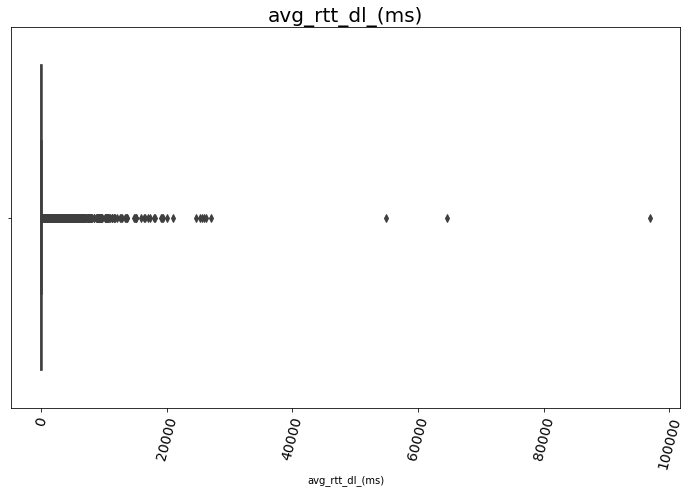

In [11]:
# plot outler distribution for experience_df 'avg_rtt_dl_(ms)' using plot_box
plots.plot_box(experience_df, 'avg_rtt_dl_(ms)', 'avg_rtt_dl_(ms)')

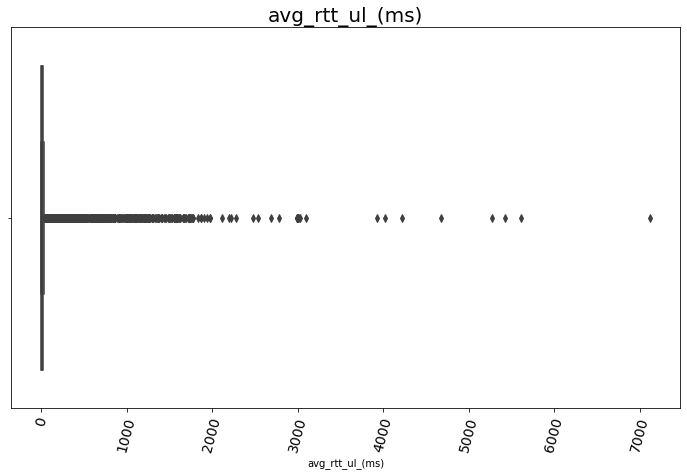

In [12]:
# plot outler distribution for experience_df 'avg_rtt_ul_(ms)' using plot_box
plots.plot_box(experience_df, 'avg_rtt_ul_(ms)', 'avg_rtt_ul_(ms)')

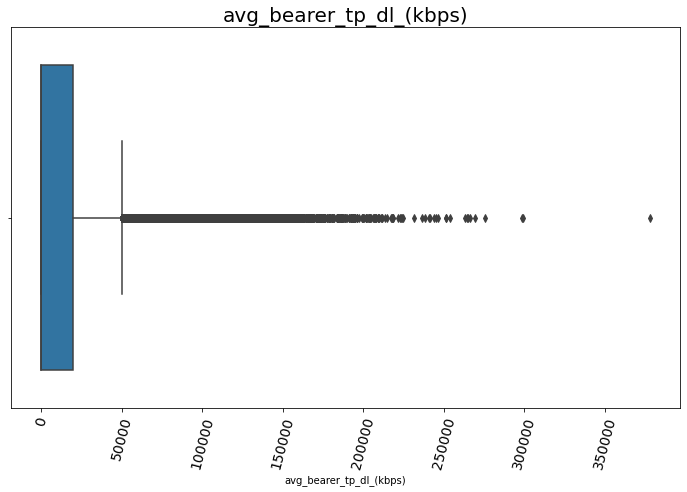

In [13]:
plots.plot_box(experience_df, 'avg_bearer_tp_dl_(kbps)', 'avg_bearer_tp_dl_(kbps)')

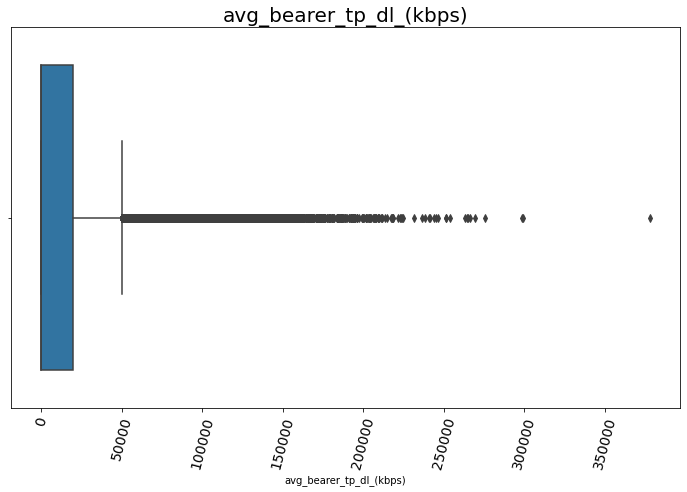

In [14]:
plots.plot_box(experience_df, 'avg_bearer_tp_dl_(kbps)', 'avg_bearer_tp_dl_(kbps)')

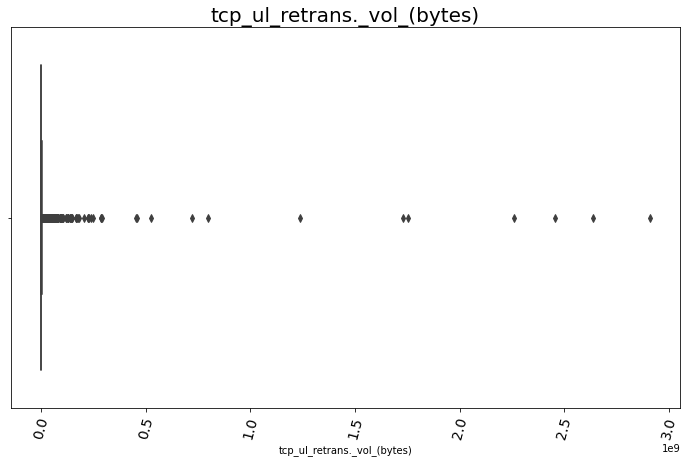

In [15]:
plots.plot_box(experience_df, 'tcp_ul_retrans._vol_(bytes)', 'tcp_ul_retrans._vol_(bytes)')

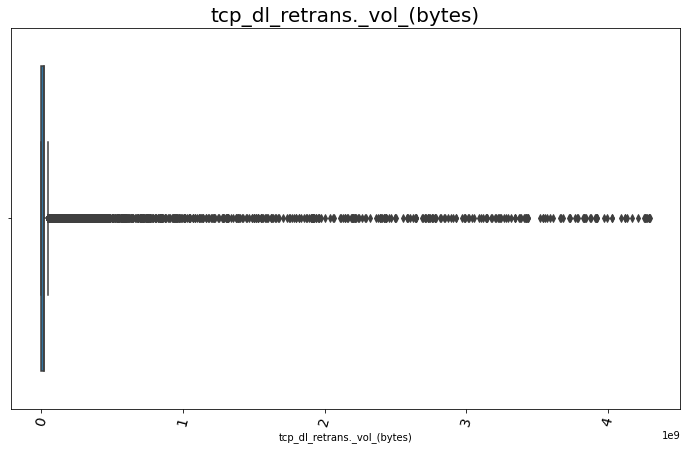

In [16]:
plots.plot_box(experience_df, 'tcp_dl_retrans._vol_(bytes)', 'tcp_dl_retrans._vol_(bytes)')

In [18]:
experience_df.shape

(146891, 8)

In [19]:

cleaned_experience_df = handle_outliers(experience_df, 'avg_rtt_dl_(ms)', method="mean")
cleaned_experience_df = handle_outliers(experience_df, 'avg_rtt_ul_(ms)', method="mean")

cleaned_experience_df = handle_outliers(experience_df, 'avg_bearer_tp_dl_(kbps)', method="mean")
cleaned_experience_df = handle_outliers(experience_df, 'avg_bearer_tp_ul_(kbps)', method="mean")

cleaned_experience_df = handle_outliers(experience_df, 'tcp_ul_retrans._vol_(bytes)', method="mean")
cleaned_experience_df = handle_outliers(experience_df, 'tcp_dl_retrans._vol_(bytes)', method="mean")



In [20]:
cleaned_experience_df.shape

(146891, 8)

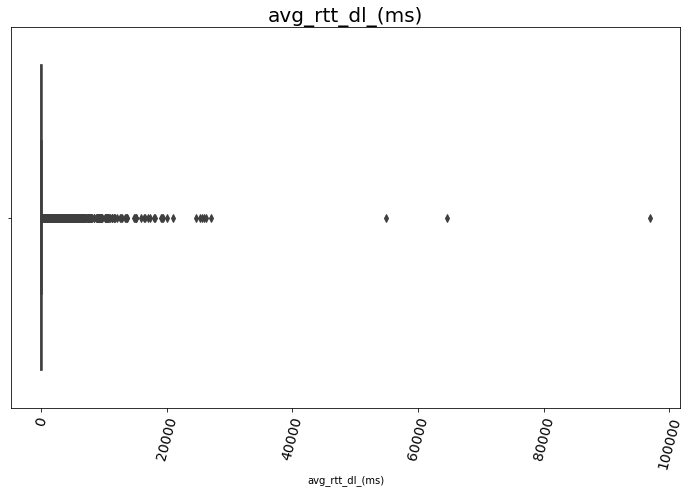

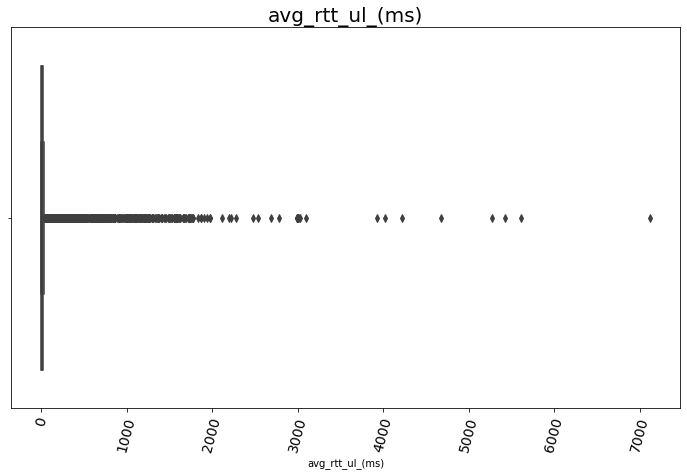

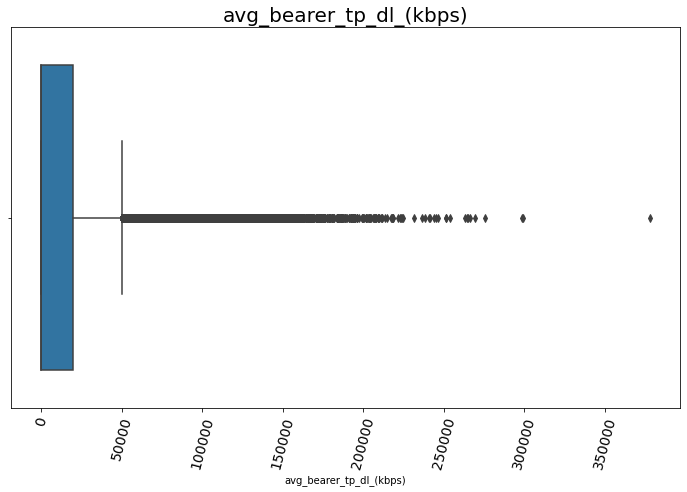

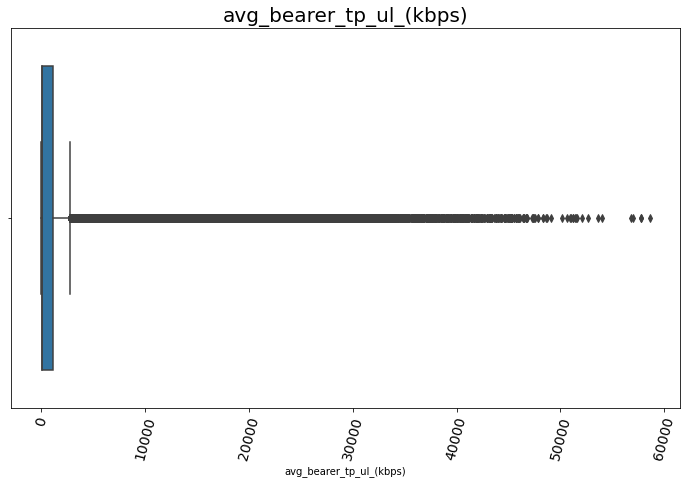

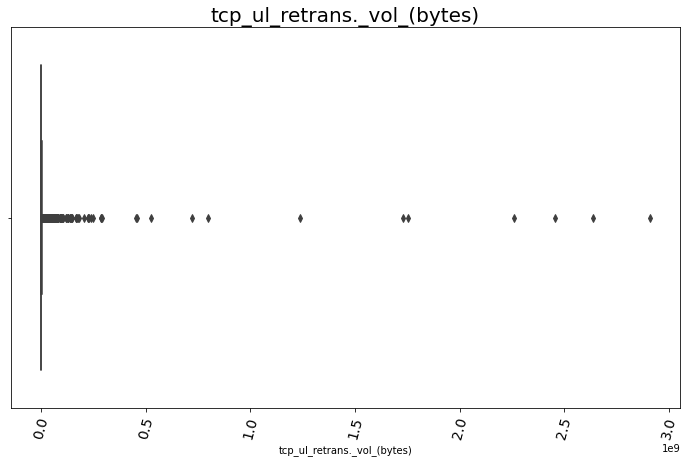

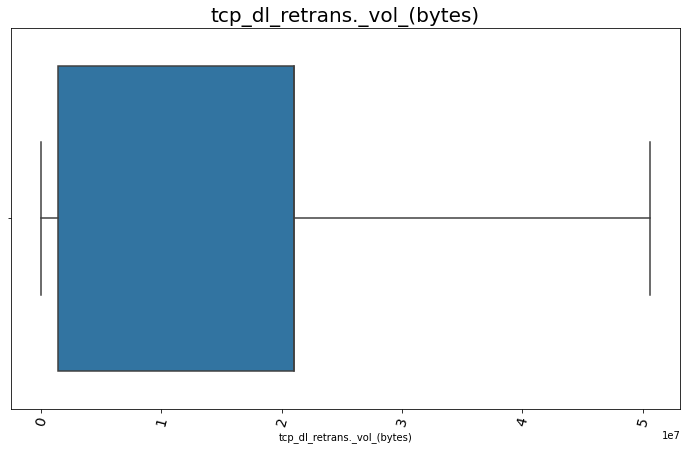

In [21]:
plots.plot_box(cleaned_experience_df, 'avg_rtt_dl_(ms)', 'avg_rtt_dl_(ms)')
plots.plot_box(cleaned_experience_df, 'avg_rtt_ul_(ms)', 'avg_rtt_ul_(ms)')
plots.plot_box(cleaned_experience_df, 'avg_bearer_tp_dl_(kbps)', 'avg_bearer_tp_dl_(kbps)')
plots.plot_box(cleaned_experience_df, 'avg_bearer_tp_ul_(kbps)', 'avg_bearer_tp_ul_(kbps)')
plots.plot_box(cleaned_experience_df, 'tcp_ul_retrans._vol_(bytes)', 'tcp_ul_retrans._vol_(bytes)')
plots.plot_box(cleaned_experience_df, 'tcp_dl_retrans._vol_(bytes)', 'tcp_dl_retrans._vol_(bytes)')

In [22]:

experience_metrics_df = pd.DataFrame(columns=['msisdn', 'handset_type', 'avg_rtt_ms',
                                              'avg_throughput_kbps', 'tcp_retrans_bytes'])

experience_metrics_df['avg_rtt_ms'] = cleaned_experience_df['avg_rtt_dl_(ms)'] + cleaned_experience_df['avg_rtt_ul_(ms)']
experience_metrics_df['avg_throughput_kbps'] = cleaned_experience_df['avg_bearer_tp_dl_(kbps)'] + cleaned_experience_df['avg_bearer_tp_ul_(kbps)']
experience_metrics_df['tcp_retrans_bytes'] = cleaned_experience_df['tcp_ul_retrans._vol_(bytes)'] + cleaned_experience_df['tcp_dl_retrans._vol_(bytes)']

experience_metrics_df['msisdn'] = cleaned_experience_df['msisdn/number']
experience_metrics_df['handset_type'] = cleaned_experience_df['handset_type']



In [23]:
experience_metrics_df.head()

,msisdn,handset_type,avg_rtt_ms,avg_throughput_kbps,tcp_retrans_bytes
0,-2147483648,Samsung Galaxy A5 Sm-A520F,47.000000,67.000000,21825280.436430
1,-2147483648,Samsung Galaxy J5 (Sm-J530),70.000000,42.000000,21825280.436430
2,-2147483648,Samsung Galaxy A8 (2018),123.593439,15.000000,21825280.436430
3,-2147483648,undefined,123.593439,88.000000,21825280.436430
4,-2147483648,Samsung Sm-G390F,123.593439,15.000000,21825280.436430


Let's see the min, max, avg, std of our engagement metrics dataframe

In [24]:
experience_metrics_df.describe()

,avg_rtt_ms,avg_throughput_kbps,tcp_retrans_bytes
count,146891.000000,146891.000000,146891.000000
mean,123.593439,15207.646609,14881528.730532
std,537.295718,26952.835523,18781257.656028
min,0.000000,0.000000,86.000000
25%,40.000000,90.000000,1521045.000000
50%,66.000000,126.000000,21825280.436430
75%,123.593439,22702.500000,21825280.436430
max,96924.000000,382262.000000,2913408387.000000


### Task 3.1, aggregate, average, average RTT, handset type, through output per customer



In [25]:

experience_agg_by_customer = experience_metrics_df.groupby('msisdn').agg({'avg_rtt_ms': 'sum',
                                                                          'avg_throughput_kbps': 'sum',
                                                                          'tcp_retrans_bytes': 'sum', 
                                                                           'handset_type': lambda x: x.mode()[0]})

In [26]:
experience_agg_by_customer = handle_outliers(experience_agg_by_customer, 'avg_rtt_ms', method="mean")

experience_agg_by_customer = handle_outliers(experience_agg_by_customer, 'avg_throughput_kbps', method="mean")

experience_agg_by_customer = handle_outliers(experience_agg_by_customer, 'tcp_retrans_bytes', method="mean")

In [27]:
experience_agg_by_customer.head()

,avg_rtt_ms,avg_throughput_kbps,tcp_retrans_bytes,handset_type
msisdn,,,,
-2147483648,18154763.776870,2233866418.000000,2185962636756.581787,Huawei B528S-23A


### Task 3.2

10 of the top, bottom and most frequent:
TCP values in the dataset.


In [28]:

tcp_trans = experience_metrics_df.sort_values(by=['tcp_retrans_bytes'], ascending=False)

top_10_tcp = tcp_trans.head(10)
bot_10_tcp = tcp_trans.tail(10)
most_tcp_frq = tcp_trans['tcp_retrans_bytes'].value_counts().head(10)


Top 10 tcp retransmission values in our datase

In [29]:

top_10_tcp[['tcp_retrans_bytes']]


,tcp_retrans_bytes
34986,2913408387.000000
74941,2639770140.000000
65724,2464813763.000000
1465,2260712162.000000
130390,1772435895.161602
33938,1748862378.161602
139207,1239951295.000000
139416,794947990.000000
64506,740624185.161602
1346,529323135.000000


Bottom 10 10 tcp retransmission values in our datase

In [30]:
bot_10_tcp[['tcp_retrans_bytes']]

,tcp_retrans_bytes
12477,143.000000
93685,134.000000
81400,134.000000
97528,129.000000
8580,128.000000
94746,113.000000
12759,108.000000
17773,106.000000
108566,97.000000
140565,86.000000


In [31]:
most_tcp_frq

21825280.436430    83580
21053672.161588      649
774232.274842        245
21053708.161588      235
772940.274842        136
21053696.161588      128
772994.274842        126
775562.274842        114
774220.274842        104
21055038.161588       97
Name: tcp_retrans_bytes, dtype: int64

10 of the top, bottom and most frequent:
RTT values in the dataset.

In [32]:
tcp_rtt = experience_agg_by_customer.sort_values(by=['avg_rtt_ms'], ascending=False)

top_10_rtt = tcp_rtt.head(10)
bot_10_rtt = tcp_rtt.tail(10)
most_rtt_frq = tcp_rtt['avg_rtt_ms'].value_counts().head(10)


Top 10 avg rtt values in our datase

In [33]:
top_10_rtt[['avg_rtt_ms']]

,avg_rtt_ms
msisdn,
-2147483648,18154763.776870


Bottom 10 avg rtt values in our datase

In [34]:
bot_10_rtt[['avg_rtt_ms']]

,avg_rtt_ms
msisdn,
-2147483648,18154763.776870


Most frequent avg rtt values

In [35]:
most_rtt_frq

18154763.776870    1
Name: avg_rtt_ms, dtype: int64

10 of the top, bottom and most frequent:
tcp throuput in the dataset.

In [36]:

tcp_throuput = experience_agg_by_customer.sort_values(by=['avg_throughput_kbps'], ascending=False)

top_10_throuput = tcp_throuput.head(10)
bot_10_throuput = tcp_throuput.tail(10)
frq_throuput = tcp_throuput['avg_throughput_kbps'].value_counts().head(10)



top 10 through output values in our dataset

In [37]:
top_10_throuput[['avg_throughput_kbps']]

,avg_throughput_kbps
msisdn,
-2147483648,2233866418.000000


bottom 10 through output values in our dataset

In [38]:
bot_10_throuput[['avg_throughput_kbps']]

,avg_throughput_kbps
msisdn,
-2147483648,2233866418.000000


Most frequent through output values

In [39]:
frq_throuput

2233866418.000000    1
Name: avg_throughput_kbps, dtype: int64

### Task 3.3

The distribution of the average throughput  per handset type and provide interpretation for your findings.


In [40]:

handset_agg = experience_metrics_df.groupby('handset_type').agg({'avg_throughput_kbps': 'sum',
                                                                       'tcp_retrans_bytes': 'sum'})

sorted_handset_agg = handset_agg.sort_values(by=['avg_throughput_kbps'], ascending=False).head(10)

handset_tp_df = sorted_handset_agg[['avg_throughput_kbps']]
handset_tp_df['handset_type'] = sorted_handset_agg.index

# handset_tp_df

##### First lets see if there is an outliers that has potential to destort our interpretation

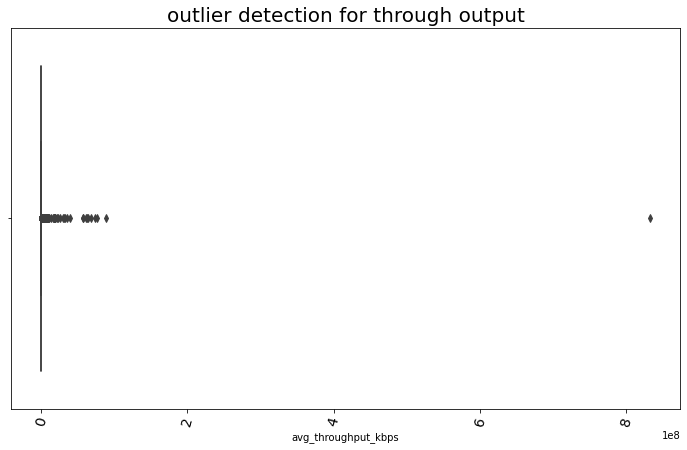

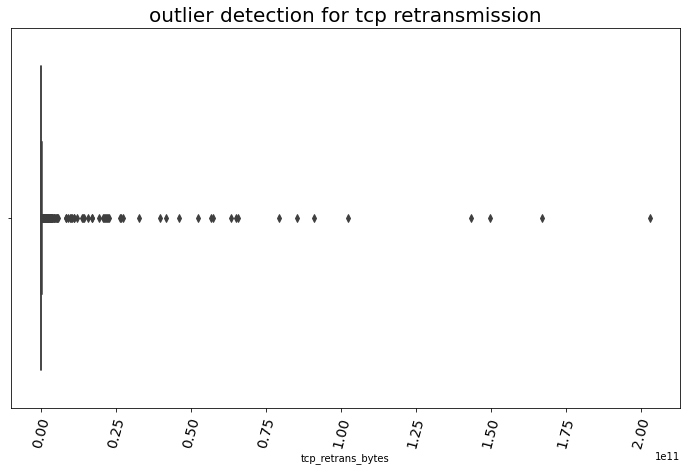

In [41]:
plots.plot_box(handset_agg, 'avg_throughput_kbps', 'outlier detection for through output')
plots.plot_box(handset_agg, 'tcp_retrans_bytes', 'outlier detection for tcp retransmission')



Both avg_throughput_kbps, and tcp_retrans_bytes has an outliers to be handled

<Figure size 648x504 with 0 Axes>

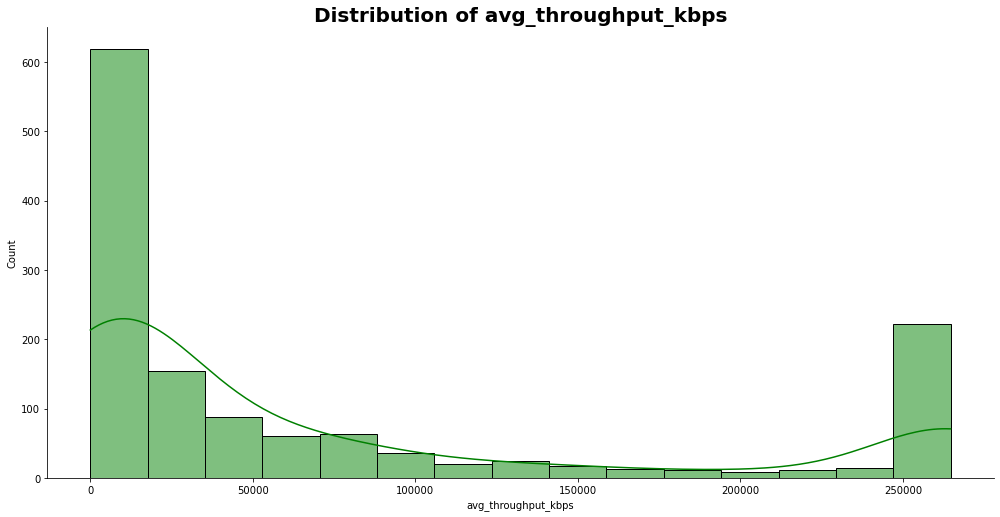

,avg_throughput_kbps,tcp_retrans_bytes
count,1363.000000,1363.000000
mean,74362.737344,1603787701.212913
std,96691.728868,11420093178.602589
min,0.000000,360.000000
25%,3041.500000,1225554.500000
50%,23669.000000,21825280.436430
75%,107681.500000,66326927.084132
max,264641.500000,202929084641.912201


In [42]:


cleaned_handset_agg =  handle_outliers(handset_agg, 'avg_throughput_kbps')

plots.plot_hist(cleaned_handset_agg, 'avg_throughput_kbps', 'green')
cleaned_handset_agg.describe()


The distribution of the average average TCP retransmission view per handset type

<Figure size 648x504 with 0 Axes>

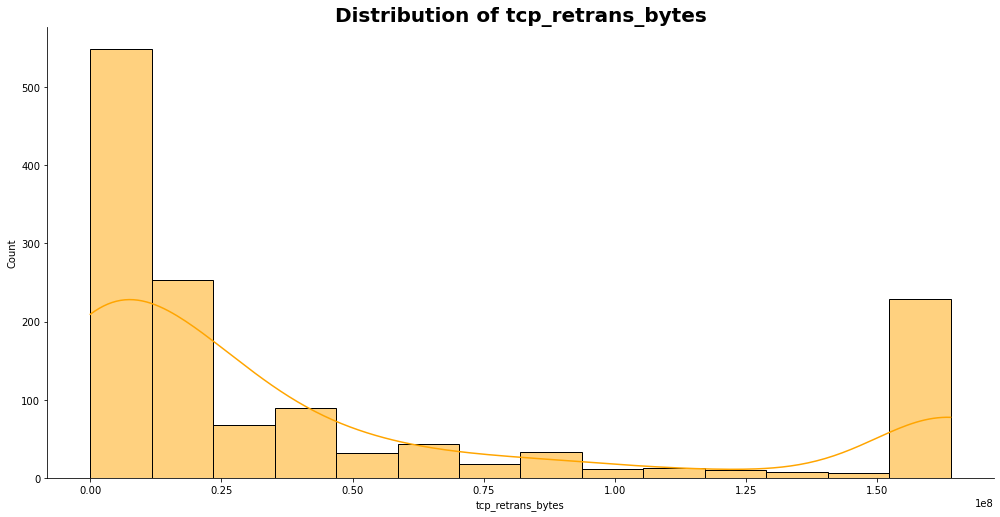

In [43]:

cleaned_handset_agg =  handle_outliers(handset_agg, 'tcp_retrans_bytes')
plots.plot_hist(cleaned_handset_agg, 'tcp_retrans_bytes', 'orange')


Both Through out put and tcp retransmission seems to be directly related. since they have the same type of distrbution

### Task 3.4

Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of experiences 

In [45]:
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.cluster import KMeans


def normalizer(df, columns):
    norm = Normalizer()
    return pd.DataFrame(norm.fit_transform(df), columns=columns)

def scaler(df, columns):
    minmax_scaler = MinMaxScaler()
    return pd.DataFrame(minmax_scaler.fit_transform(df), columns=columns)

def scale_and_normalize(df,columns ):
    return normalizer(scaler(df, columns), columns)

In [46]:
def cluser_label(x: int, cols: list = []) -> str:
    if (not type(x) == int):
        return x
    if (x < len(cols)):
        return cols[x]

    return str(x)

In [60]:
experience_metrics_df.shape

(146891, 5)

Normalization

In [61]:

metrics = experience_metrics_df[['avg_rtt_ms', 'avg_throughput_kbps', 'tcp_retrans_bytes']]

# handling outliers
metrics_cleaned = metrics.copy()
metrics_cleaned = handle_outliers(metrics_cleaned, 'avg_rtt_ms', 'mean')
metrics_cleaned = handle_outliers(metrics_cleaned, 'avg_throughput_kbps', 'mean')
metrics_cleaned = handle_outliers(metrics_cleaned, 'tcp_retrans_bytes', 'mean')

normalized_metrics = scaler(metrics_cleaned, ['avg_rtt_ms', 'avg_throughput_kbps', 'tcp_retrans_bytes'])
normalized_metrics.describe()


,avg_rtt_ms,avg_throughput_kbps,tcp_retrans_bytes
count,146891.000000,146891.000000,146891.000000
mean,0.319738,0.163402,0.281290
std,0.184000,0.255226,0.191500
min,0.000000,0.000000,0.000000
25%,0.161290,0.001590,0.029137
50%,0.266129,0.002225,0.418102
75%,0.498361,0.268587,0.418102
max,1.000000,1.000000,1.000000


In [62]:
kmeans = KMeans(n_clusters=3, init='k-means++').fit(normalized_metrics)

In [64]:

pred = kmeans.predict(normalized_metrics)

experience_metrics_with_cluster = experience_agg_by_customer.copy()
experience_metrics_with_cluster['clusters'] = pred
experience_metrics_with_cluster['clusters'].value_counts()

ValueError: Length of values (146891) does not match length of index (1)

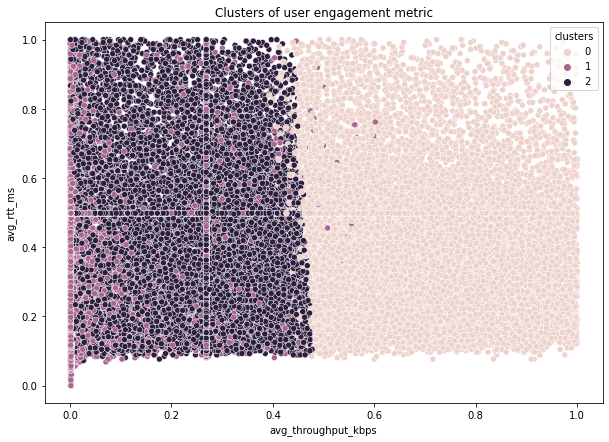

In [65]:
# labels = ['cluser_1', 'cluser_2', 'cluser_3']

# experience_metrics_with_cluster['clusters']  = experience_metrics_with_cluster['clusters'].map(lambda x:
#                                                                                              cluser_label(x, labels))

normalized_metrics['clusters'] = pred
plt.figure(figsize=(10,7))

sns.scatterplot(x = 'avg_throughput_kbps', y='avg_rtt_ms',
                hue='clusters', data=normalized_metrics).set_title('Clusters of user engagement metric')

plt.show()


#### Saving user expiernce metrics

In [66]:
TelecomHelper.save_csv(experience_metrics_with_cluster, '../data/user_experience_metrics.csv')

File Successfully Saved.!!!


,avg_rtt_ms,avg_throughput_kbps,tcp_retrans_bytes,handset_type
msisdn,,,,
-2147483648,18154763.776870,2233866418.000000,2185962636756.581787,Huawei B528S-23A


### Task 4.1 B

experience score to each user

In [67]:
normal_metrics_with_cluster_2 = normalized_metrics.copy()
kmeans

KMeans(n_clusters=3)

In [68]:
distance = kmeans.fit_transform(normal_metrics_with_cluster_2)

distance_from_less_exp = list(map(lambda x : x[0], distance))

experience_metrics_with_cluster_2 = experience_metrics_with_cluster.copy()
experience_metrics_with_cluster_2['score'] = distance_from_less_exp

ValueError: Length of values (146891) does not match length of index (1)

We save experience metrics df that has a score columns

In [54]:
experience_metrics_with_cluster_2['msisdn'] = experience_metrics_with_cluster_2.index

In [55]:
TelecomHelper.save_csv(experience_metrics_with_cluster_2, '../data/user_experience_metrics.csv')

File Successfully Saved.!!!


,avg_rtt_ms,avg_throughput_kbps,tcp_retrans_bytes,handset_type,clusters,score,msisdn
msisdn,,,,,,,
-2147483648,18154763.776870,2233866418.000000,2185962636756.581787,Huawei B528S-23A,0,0.000000,-2147483648
